### Introducing censoring

![img](https://lifelines.readthedocs.io/en/latest/_images/survival_analysis_intro_censoring.png)


![img2](https://lifelines.readthedocs.io/en/latest/_images/survival_analysis_intro_censoring_revealed.png)

All we know is that actual lifetime is greater than some threshold. Mathematically, we know $P(T \ge t) = 1 - F(t) := S(t)$. We can use this in our log likelihood:

No censoring cases:

$$l(\theta, t) = \sum_{\text{observed}} \log{\text{pdf}(\theta, t)} $$

With censoring cases:
$$ 
\begin{align}
l(\theta, t) & = \sum_{\text{observed}} \log{\text{pdf}(t, \theta)} + \sum_{\text{censored}} \log{\text{S}(t, \theta)} \\
& = \sum_{\text{observed}} \log{\text{pdf}(t, \theta)} \frac{S(t)}{S(t)} + \sum_{\text{censored}} \log{\text{S}(t, \theta)} \\
& = \sum_{\text{observed}} (\log{\frac{\text{pdf}(t, \theta)}{S(t)}} + \log{S(t)}) + \sum_{\text{censored}} \log{\text{S}(t, \theta)} \\
& = \sum_{\text{observed}} \log{\frac{\text{pdf}(t, \theta)}{S(t)}} + \sum_{\text{observed}} \log{S(t)} + \sum_{\text{censored}} \log{\text{S}(t, \theta)} \\
& = \sum_{\text{observed}} \log{\frac{\text{pdf}(t, \theta)}{S(t)}} + \sum \log{S(t)} 
\end{align}
$$



The $-\log{S(t)}$ is known as the _cumulative hazard_, denoted $H(t)$. 

$$l(\theta, t) = \sum_{\text{observed}} \log{\frac{\text{pdf}(t, \theta)}{S(t)}} - \sum H(t, \theta) $$

Also, $\frac{dH}{dt} = \frac{\text{pdf}(t, \theta)}{S(t)}$. Denote that $h(t)$. 

$$l(\theta, t) = \sum_{\text{observed}} \log{h(t, \theta}) - \sum H(t, \theta) $$

Phew! Now, instead of working in probability space, we will work in hazard space! Here's a link to all the relatioships: https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html#hazard-function 


## Take away: the likelihood function can be used to "add" information about the system (think about how penalizers are used...)

In [26]:
# the hazard and cumulative hazard for Weibull are much simplier to implement 😗👌

def cumulative_hazard(params, t):
    lambda_, rho_ = params
    return (t / lambda_) ** rho_

def hazard(params, t):
    # diff of cumulative hazard w.r.t. t
    lambda_, rho_ = params
    return rho_ / lambda_ * (t / lambda_) ** (rho_ - 1)

def log_hazard(params, t):
    lambda_, rho_ = params
    return np.log(rho_) - np.log(lambda_) + (rho_ - 1) * (np.log(t) - np.log(lambda_))



def log_likelihood(params, t, e):
    return np.sum(e * log_hazard(params, t)) - np.sum(cumulative_hazard(params, t))


In [27]:
T = (np.random.exponential(size=1000)/1.5) ** 2.3
E = np.random.binomial(1, 0.95, size=1000)

from scipy.optimize import minimize

results = minimize(log_likelihood, 
        x0 = np.array([1.0, 1.0]),
        method=None, 
        args=(T, E),
        bounds=((0.00001, None), (0.00001, None)))

print(results)

      fun: -inf
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.68816483e+119, -5.60856575e+117])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 156
      nit: 1
   status: 2
  success: False
        x: array([ 10.94470705, 298.91507043])


/Users/camerondavidson-pilon/venvs/data/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in power
  """


In [28]:
def negative_log_likelihood(params, t, e):
    return -log_likelihood(params, t, e)

results = minimize(negative_log_likelihood, 
        x0 = np.array([1.0, 1.0]),
        method=None, 
        args=(T, E),
        bounds=((0., None), (0., None)))

print(results)

      fun: 72.94468648864824
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.13686838e-05, 1.13686838e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 10
   status: 0
  success: True
        x: array([0.38907425, 0.43924119])


Text(0.5, 1.0, 'Estimated survival function')

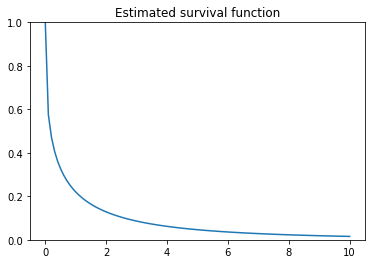

In [35]:
t = np.linspace(0, 10, 100)
plt.plot(t, np.exp(-cumulative_hazard(results.x, t)))
plt.ylim(0, 1)
plt.title("Estimated survival function")

Let's move to part 3. 